# Model Prediction - Businesses

Using our trained logistic regression model, I use the business validation dataset and generate predictions for individual reviews and visually inspect those reviews to compare them to the model's predictions.

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## Load model and features

In [3]:
features = np.load('../data/bus_valid_features.npy')

In [2]:
with open('../models/logisticreg.pkl', 'rb') as m:
    model = pickle.load(m)

## Get predictions for reviews in validation set

In [11]:
preds = model.predict(features)

In [13]:
len(model.predict(features)), sum(model.predict(features))

(635308, 635275)

We can see that the model essentially predicts that all but 33 of the reviews are 'Useful.' At first glance, this may suggest that our model is flawed; however, we should keep in mind that **all of the reviews in the validation set in actuality have at least 1 or 2 useful votes!**

Let's take a look at what reviews the model is predicting is NOT useful:

In [23]:
not_useful = np.where(preds==0)

In [16]:
bus = pd.read_csv('../data/businesses_validation.csv')

In [39]:
not_useful_reviews = bus[bus.index.isin(list(not_useful[0]))][['stars', 'text']]

In [44]:
not_useful_reviews

,stars,text
53072,5.0,Everything cookie was epic
59874,5.0,Best coffee in Leslieville.
84254,5.0,Love my local bar!
108618,5.0,I love this mall!
126588,5.0,fast and easy!
148618,5.0,O.o
160696,5.0,$2.50 dry clean fast!
164238,4.0,Awesome place
171497,5.0,closed.
176087,3.0,Finis.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2408705a58>]], dtype=object)

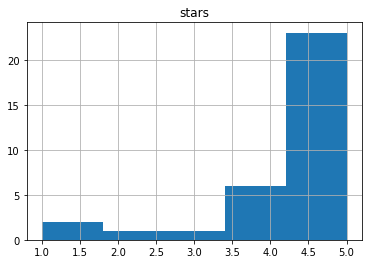

In [42]:
not_useful_reviews.hist('stars', bins=5)

We can see that these reviews are mostly 4 or 5 star reviews and are very short (often 4 words or less). Some of the reviews are essentially meaningless **(250844, 278918)** while others contain very little information or convey a simple emotion such as dislike or favoritism **(583751, 360307)**. However, we do notice that some short reviews can provide information about a specific product a business provides **(602469, 160696)**. 